Datensatzgröße: (15744, 17)
Erste 5 Zeilen des Datensatzes:
Datentypen im Datensatz:
Strecke_Bezeichnung            object
bezugsmonat                    object
Abschnitt                      object
Bezugsmonat_Vorjahresmonat     object
DTV_Bezugsmonat               float64
DTV_Vorjahresmonat            float64
DTV_P_Bezugsmonat             float64
DTV_P_Vorjahresmonat          float64
DTV_G_Bezugsmonat             float64
DTV_G_Vorjahresmonat          float64
ISB                            object
Abschnitt_von                  object
Bemerkung                      object
verbindung                     object
Reihung                        object
Abschnitt_bis                  object
geo_point_2d                   object
dtype: object

Anzahl fehlender Werte pro Spalte:
Strecke_Bezeichnung               0
bezugsmonat                       0
Abschnitt                         0
Bezugsmonat_Vorjahresmonat        0
DTV_Bezugsmonat                   0
DTV_Vorjahresmonat              325
DTV

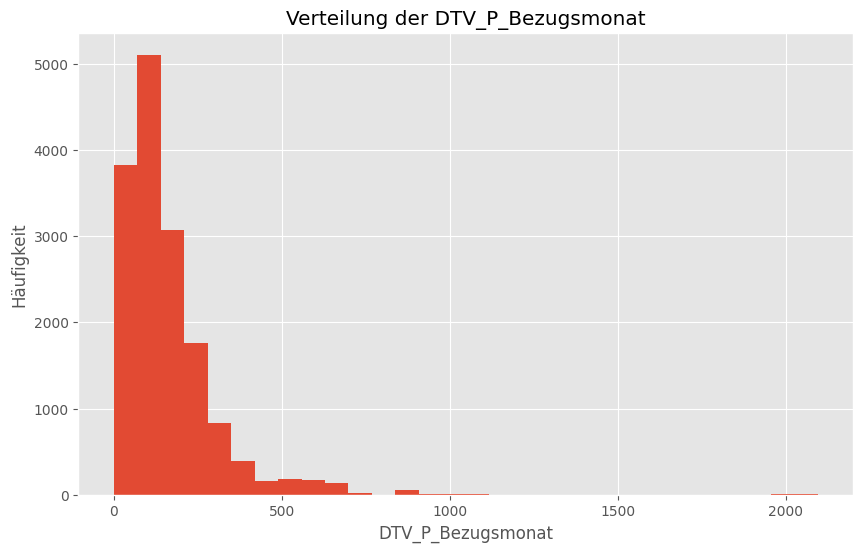


Statistische Kennzahlen der numerischen Spalten:


,Mittelwert,Median,Standardabweichung,Minimum,Maximum
DTV_Bezugsmonat,178.526085,138.940,160.647230,0.00,2106.93
DTV_Vorjahresmonat,181.236701,146.800,161.240000,0.03,2131.32
DTV_P_Bezugsmonat,154.904260,117.575,149.551175,0.00,2097.20
DTV_P_Vorjahresmonat,156.052862,119.630,149.641158,0.00,2122.19
DTV_G_Bezugsmonat,23.621717,9.680,31.572259,0.00,226.07
DTV_G_Vorjahresmonat,25.183841,9.570,34.352506,0.00,245.00



Identifizierte Streckenspalten: ['Strecke_Bezeichnung', 'Abschnitt', 'Abschnitt_von', 'Abschnitt_bis']

Beispiele für Strecken:
0            Genève Aéroport - Lausanne-Allaman – Etoy
1    Genève Aéroport - Lausanne-Châtelaine (bif) – ...
2    Genève Aéroport - Lausanne-Châtelaine (bif) – ...
3    Genève Aéroport - Lausanne-Chambésy – Vengeron...
4           Genève Aéroport - Lausanne-Coppet – Founex
Name: strecke_komplett, dtype: object
Anzahl eindeutiger Strecken: 1312

Top-Strecken nach Häufigkeit:
strecke_komplett
Ziegelbrücke - Glarus - Linthal-Linthal Braunwaldbahn – Linthal        12
Ziegelbrücke / Buchs - Sargans - Chur-Ziegelbrücke – Weesen            12
Thalwil - Pfäffikon - Ziegelbrücke-Lachen SZ – Siebnen-Wangen          12
Zürich Wiedikon - Kilchberg - Thalwil-Thalwil Nord (Abzw) – Thalwil    12
Rotkreuz - Zug - Thalwil-Litti (Baar) – Baar                           12
Cadenazzo Ovest - Locarno-Ponte Ticino Ovest (c bin) – Riazzino        12
Giubiasco - Pino Transito-Giubia

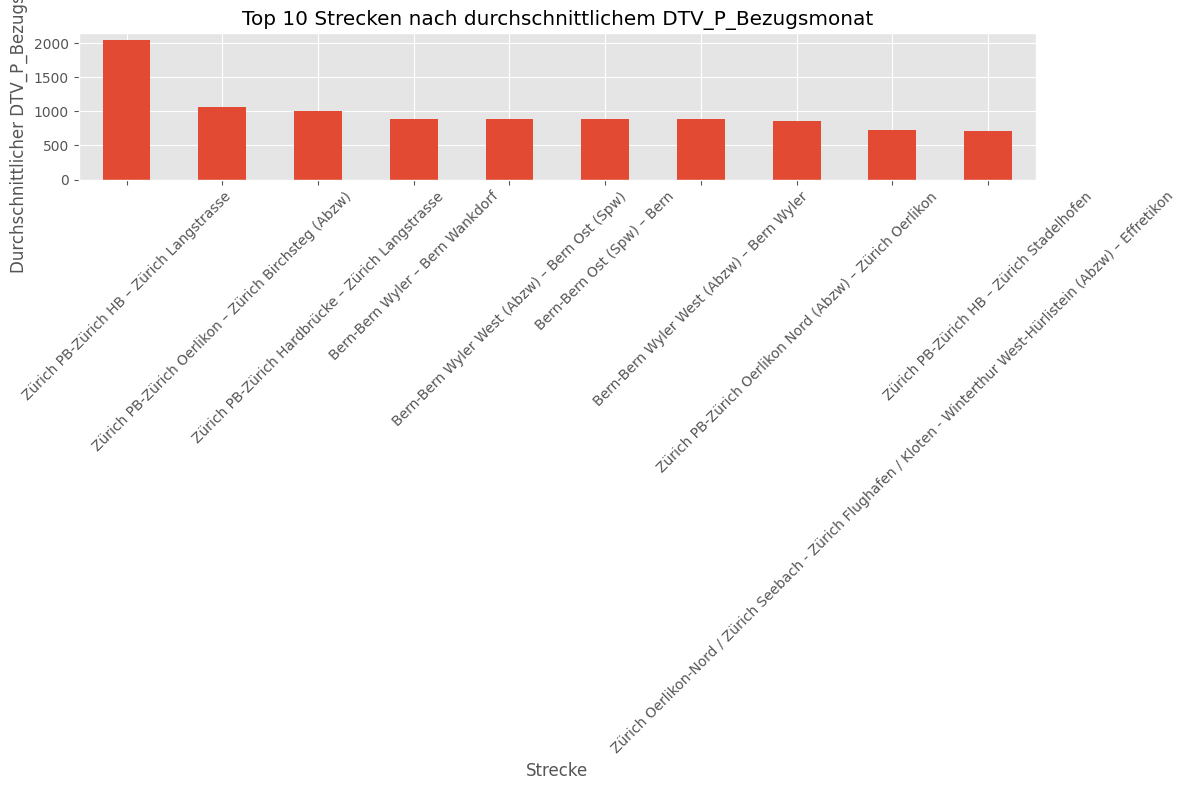

Konnte keine monatliche Analyse durchführen.


<Figure size 1000x600 with 0 Axes>

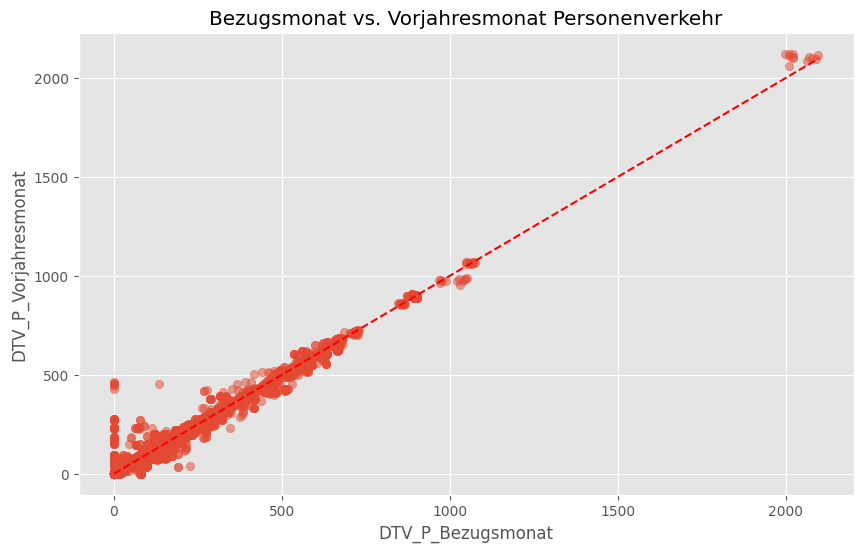

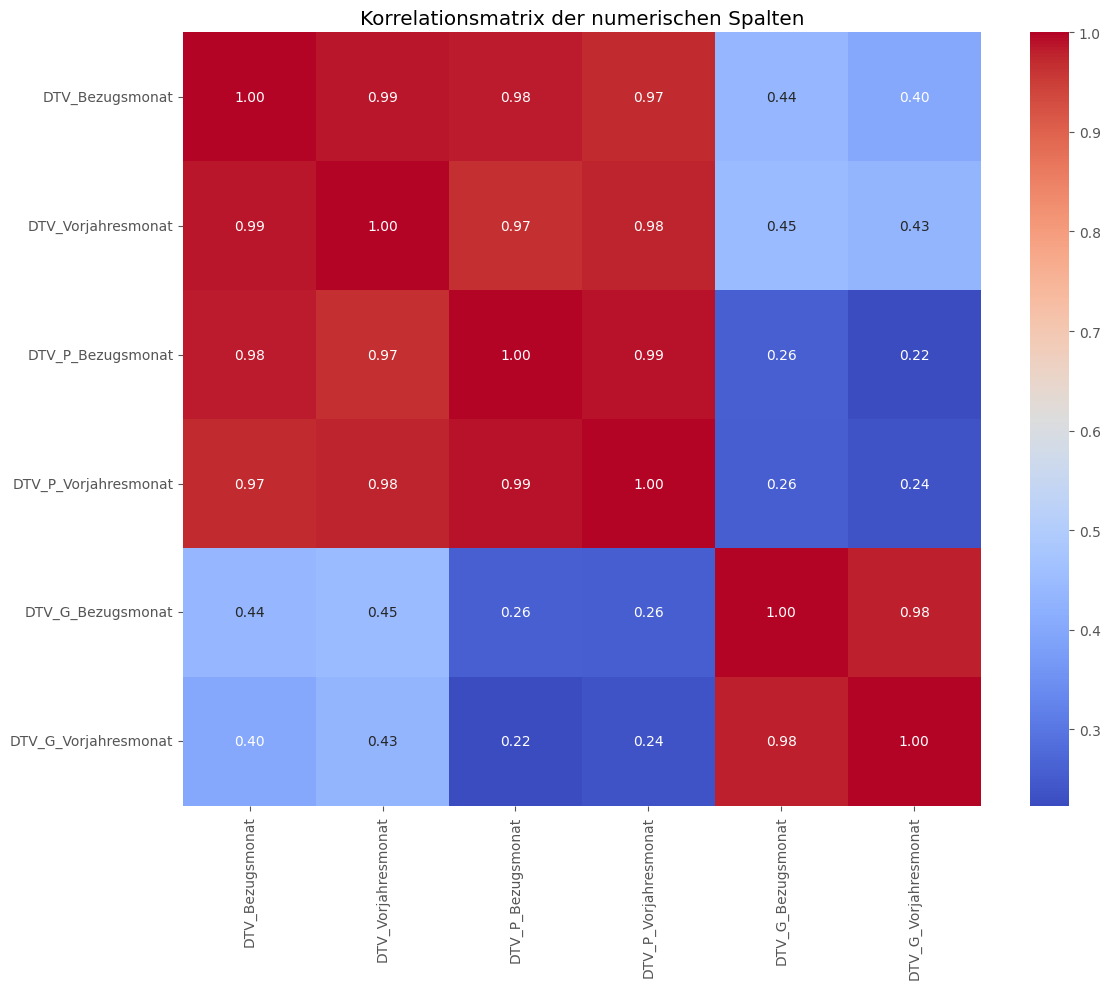


Beispiel für originale vs. skalierte Daten:
   DTV_Bezugsmonat  DTV_Vorjahresmonat  DTV_P_Vorjahresmonat  \
0           379.83              370.17                338.67   
1           351.90              338.03                330.06   
2           322.30              341.53                332.87   
3           442.65              440.87                410.90   
4           302.48              299.35                266.35   

   DTV_Bezugsmonat_scaled  DTV_Vorjahresmonat_scaled  \
0                1.253120                   1.171790   
1                1.079256                   0.972453   
2                0.894995                   0.994161   
3                1.644176                   1.610281   
4                0.771615                   0.732555   

   DTV_P_Vorjahresmonat_scaled  
0                     1.220407  
1                     1.162867  
2                     1.181646  
3                     1.703110  
4                     0.737101  

Die bearbeiteten Daten wurden als 

In [4]:
# Import der notwendigen Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import math

# Markdown-Zelle: Einführung zum Projekt
"""
# Analyse der SBB Zugzahlen pro Monat

## Zielsetzung
In diesem Notebook analysiere ich die monatlichen Zugzahlen des Schweizer Bahnsystems. 
Ich möchte ein Modell erstellen, das die Passagierzahlen für verschiedene Zugstrecken 
vorhersagen kann.

## Datenbasis
Der Datensatz enthält Informationen über Zugverbindungen, einschliesslich:
- Streckennamen und Abschnitte
- Monatliche Verkehrszahlen (DTV)
- Passagier- und Güterzahlen 

Mein Ziel ist es, Muster in den Passagierzahlen zu identifizieren und diese zur Vorhersage zu nutzen.
"""

# Laden der Daten mit Semikolon als Trennzeichen
df = pd.read_csv('zugzahlen_pro_monat.csv', sep=';')
print(f"Datensatzgrösse: {df.shape}")
print("Erste 5 Zeilen des Datensatzes:")
df.head()

# Markdown-Zelle: Datenexploration
"""
## Datenexploration
Zunächst untersuche ich die Struktur und grundlegende Statistiken des Datensatzes.
"""

# Datentypen und fehlende Werte überprüfen
print("Datentypen im Datensatz:")
print(df.dtypes)
print("\nAnzahl fehlender Werte pro Spalte:")
print(df.isnull().sum())

# Identifizieren der potentiellen Zielspalten
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nNumerische Spalten:", numeric_cols)

# Wenn 'DTV_P_Bezugsmonat' existiert (Durchschnittlicher Täglicher Verkehr - Personen), 
# verwenden wir das als Zielwert
if 'DTV_P_Bezugsmonat' in df.columns:
    target_column = 'DTV_P_Bezugsmonat'
    print(f"\nZielspalte für Passagierzahlen: {target_column}")
    
    # Grundlegende Statistiken des Zielwerts
    print(f"\nGrundlegende Statistiken für {target_column}:")
    print(df[target_column].describe())
    
    # Visualisierung der Verteilung des Zielfelds
    plt.figure(figsize=(10, 6))
    plt.hist(df[target_column], bins=30)
    plt.title(f'Verteilung der {target_column}')
    plt.xlabel(target_column)
    plt.ylabel('Häufigkeit')
    plt.grid(True)
    plt.show()
else:
    print("Keine eindeutige Passagierzahlspalte gefunden. Verfügbare numerische Spalten:")
    for col in numeric_cols:
        print(f"- {col}")

# Markdown-Zelle: Auswahl des Zielfelds
"""
## 2.1 Auswahl des Zielfelds für die Vorhersage

Für dieses Projekt wähle ich die Spalte 'DTV_P_Bezugsmonat' als Zielfeld für die Vorhersage.
Diese Spalte enthält die durchschnittliche tägliche Personenverkehrszahl für einen bestimmten Streckenabschnitt 
im Bezugsmonat. Die Vorhersage dieser Zahl ist für Kapazitätsplanung und Ressourcenallokation wichtig.
"""

# Markdown-Zelle: Statistische Analyse
"""
## 2.2 Statistische Analyse der Datenfelder

Hier analysiere ich jedes numerische Feld und berechne relevante statistische Informationen.
"""

# Berechnung statistischer Kennzahlen für jede numerische Spalte
if len(numeric_cols) > 0:
    stats_df = pd.DataFrame({
        'Mittelwert': df[numeric_cols].mean(),
        'Median': df[numeric_cols].median(),
        'Standardabweichung': df[numeric_cols].std(),
        'Minimum': df[numeric_cols].min(),
        'Maximum': df[numeric_cols].max()
    })
    print("\nStatistische Kennzahlen der numerischen Spalten:")
    display(stats_df)

# Markdown-Zelle: Streckeninformationen
"""
## Verarbeitung von Strecken- und Abschnittsdaten

Um die Strecken und Abschnitte für die ML-Algorithmen nutzbar zu machen,
konvertiere ich diese Informationen in numerische Features.
"""

# Identifizieren von Streckenspalten
route_cols = [col for col in df.columns if any(term in col.lower() for term in 
              ['strecke', 'abschnitt', 'von', 'bis', 'station'])]
print("\nIdentifizierte Streckenspalten:", route_cols)

# Strecke als Feature erstellen, wenn relevante Spalten vorhanden sind
if 'Strecke_Bezeichnung' in df.columns and 'Abschnitt' in df.columns:
    df['strecke_komplett'] = df['Strecke_Bezeichnung'] + '-' + df['Abschnitt']
    print("\nBeispiele für Strecken:")
    print(df['strecke_komplett'].head())
    
    # Anzahl der eindeutigen Strecken
    unique_routes = df['strecke_komplett'].nunique()
    print(f"Anzahl eindeutiger Strecken: {unique_routes}")
    
    # Top-Strecken nach Anzahl der Einträge
    print("\nTop-Strecken nach Häufigkeit:")
    print(df['strecke_komplett'].value_counts().head(10))

# Encodierung der Strecken
from sklearn.preprocessing import LabelEncoder

if 'strecke_komplett' in df.columns:
    encoder = LabelEncoder()
    df['strecke_encoded'] = encoder.fit_transform(df['strecke_komplett'])
    
    print("\nEncodierung für Strecken (erste 5 Beispiele):")
    mapping_sample = pd.DataFrame({
        'strecke_komplett': df['strecke_komplett'].unique()[:5],
        'strecke_encoded': encoder.transform(df['strecke_komplett'].unique()[:5])
    })
    print(mapping_sample)

# Markdown-Zelle: Datenvisualisierung
"""
## 2.3 Grafische Datenanalyse

Im Folgenden erstelle ich verschiedene Visualisierungen, um Muster und Beziehungen 
in den Daten besser zu verstehen.
"""

# Visualisierung 1: Top-Strecken nach Passagierzahl
if 'strecke_komplett' in df.columns and target_column in df.columns:
    plt.figure(figsize=(12, 8))
    top_strecken = df.groupby('strecke_komplett')[target_column].mean().sort_values(ascending=False).head(10)
    top_strecken.plot(kind='bar')
    plt.title(f'Top 10 Strecken nach durchschnittlichem {target_column}')
    plt.xlabel('Strecke')
    plt.ylabel(f'Durchschnittlicher {target_column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Visualisierung 2: Zeitliche Muster
if 'bezugsmonat' in df.columns and target_column in df.columns:
    plt.figure(figsize=(10, 6))
    if df['bezugsmonat'].dtype == 'object':
        # Versuche, den Monat zu extrahieren, falls im Format "MM.YYYY" oder ähnlich
        try:
            df['monat'] = df['bezugsmonat'].str.split('.').str[0].astype(int)
            monthly_data = df.groupby('monat')[target_column].mean()
            monthly_data.plot()
            plt.title(f'Durchschnittlicher {target_column} nach Monat')
            plt.xlabel('Monat')
            plt.ylabel(f'Durchschnittlicher {target_column}')
            plt.xticks(range(1, 13))
            plt.grid(True)
            plt.show()
        except:
            print("Konnte keine monatliche Analyse durchführen.")
    else:
        try:
            monthly_data = df.groupby('bezugsmonat')[target_column].mean()
            monthly_data.plot()
            plt.title(f'Durchschnittlicher {target_column} nach Bezugsmonat')
            plt.xlabel('Bezugsmonat')
            plt.ylabel(f'Durchschnittlicher {target_column}')
            plt.grid(True)
            plt.show()
        except:
            print("Konnte keine Analyse nach Bezugsmonat durchführen.")

# Visualisierung 3: Korrelation zwischen aktuellen und Vorjahreswerten
if 'DTV_P_Bezugsmonat' in df.columns and 'DTV_P_Vorjahresmonat' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['DTV_P_Bezugsmonat'], df['DTV_P_Vorjahresmonat'], alpha=0.5)
    plt.plot([df['DTV_P_Bezugsmonat'].min(), df['DTV_P_Bezugsmonat'].max()], 
             [df['DTV_P_Bezugsmonat'].min(), df['DTV_P_Bezugsmonat'].max()], 'r--')
    plt.title('Bezugsmonat vs. Vorjahresmonat Personenverkehr')
    plt.xlabel('DTV_P_Bezugsmonat')
    plt.ylabel('DTV_P_Vorjahresmonat')
    plt.grid(True)
    plt.show()

# Visualisierung 4: Korrelationsheatmap für numerische Spalten
if len(numeric_cols) > 1:
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Korrelationsmatrix der numerischen Spalten')
    plt.tight_layout()
    plt.show()

# Markdown-Zelle: Überlegungen zur Datenskalierung
"""
## 2.4 Überlegungen zur Datenskalierung

In diesem Datensatz haben wir verschiedene numerische Spalten, die Verkehrszahlen repräsentieren.
Da die Personenverkehrszahlen (DTV_P) und Güterverkehrszahlen (DTV_G) in unterschiedlichen
Grössenordnungen sein können, ist eine Skalierung für bestimmte Algorithmen sinnvoll.

Eine Skalierung ist besonders wichtig, wenn:
1. Wir unterschiedliche Masseinheiten kombinieren (z.B. Verkehrszahlen und Streckenlängen)
2. Die Wertebereiche der verschiedenen Features stark unterschiedlich sind
3. Wir Algorithmen wie SVM, k-means oder neuronale Netze verwenden, die auf die Skalierung empfindlich reagieren

Für unser Random Forest-Modell ist die Skalierung weniger kritisch, da dieser Algorithmus
nicht auf unterschiedliche Wertebereiche reagiert. Dennoch führe ich hier die Skalierung durch,
um die Daten für verschiedene Algorithmen vorzubereiten.
"""

# Skalierung der numerischen Features
if len(numeric_cols) > 0:
    scaler = StandardScaler()
    scaled_features = {}
    
    for col in numeric_cols:
        if col != target_column:  # Zielwert nicht skalieren
            df[f'{col}_scaled'] = scaler.fit_transform(df[[col]])
            scaled_features[col] = f'{col}_scaled'
    
    print("\nBeispiel für originale vs. skalierte Daten:")
    sample_cols = list(scaled_features.keys())[:3]  # Erste 3 skalierten Spalten als Beispiel
    if sample_cols:
        sample_df = df[[*sample_cols, *[scaled_features[col] for col in sample_cols]]].head()
        print(sample_df)

# Die bearbeiteten Daten speichern
df.to_csv('zugzahlen_processed.csv', index=False)
print("\nDie bearbeiteten Daten wurden als 'zugzahlen_processed.csv' gespeichert.")

# Zeige die finale Datenstruktur
print("\nStruktur des aufbereiteten Datensatzes:")
print(f"Anzahl Zeilen: {df.shape[0]}, Anzahl Spalten: {df.shape[1]}")
print("Spalten:", list(df.columns))